In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Здесь столбцы, которые требуют дополнительной проверки данных. Их сложно оценить на адекватность на бытовом уровне.

In [ ]:
fn = "data_1.csv"
df = pd.read_csv(fn, delimiter=";")
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,год,время_года,климат,город,страна,способ_охлаждения,режим_при_смешанном_типе_охлаждения,способ_обогрева,возраст,пол,...,скорость_воздуха,рост,вес,занавески,вентилятор,окно,двери,отопление,среднемесячная_температура_на_улице,количество_рекламаций
0,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,22.0,NaN,...,0.26,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,0
1,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,40.0,NaN,...,0.12,NaN,NaN,0.0,0.0,NaN,NaN,NaN,84.0,0
2,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,42.0,NaN,...,0.08,NaN,NaN,0.0,0.0,NaN,NaN,NaN,32.8,0
3,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,27.0,NaN,...,27.16,NaN,NaN,1.0,1.0,NaN,NaN,NaN,28.9,1
4,2011.0,Лето,Cубтропический океанический,Техас,США,Кондиционирование,NaN,NaN,46.0,NaN,...,63.83,NaN,NaN,1.0,1.0,NaN,NaN,NaN,32.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2012.0,Лето,Влажный субтропический муссонный,Дели,Индия,Смешанный,Вентиляция,NaN,35.0,Мужской,...,0.32,172.7,50.0,NaN,1.0,1.0,NaN,0.0,30.9,0
480,2012.0,Зима,Тропическая влажная саванна,Ченнай,Индия,Смешанный,Кондиционирование,NaN,NaN,Мужской,...,0.16,NaN,65.0,NaN,NaN,0.0,0.0,NaN,30.8,0
481,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0
482,2012.0,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,NaN,NaN,Женский,...,0.02,NaN,76.0,NaN,NaN,0.0,0.0,NaN,21.6,0


In [ ]:
def custom_correct():
    global df
    replace_climat = {"Cубтроп океанич": "Cубтропический океанический"}
    replace_delta_temp = {"Холодн": "Холоднее", "Тепле": "Теплее"}
    df["климат"] = df["климат"].apply(
        lambda x: replace_climat[x] if x in replace_climat.keys() else x
    )
    df["предпочтительное_изменение_температуры"] = df[
        "предпочтительное_изменение_температуры"
    ].apply(lambda x: replace_delta_temp[x] if x in replace_delta_temp.keys() else x)



def dtype_to_int(cols: list):
    for col in cols:
        df[col] = df[col].astype(int)

In [ ]:
custom_correct()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   год                                          484 non-null    float64
 1   время_года                                   484 non-null    object 
 2   климат                                       484 non-null    object 
 3   город                                        484 non-null    object 
 4   страна                                       484 non-null    object 
 5   способ_охлаждения                            484 non-null    object 
 6   режим_при_смешанном_типе_охлаждения          337 non-null    object 
 7   способ_обогрева                              222 non-null    object 
 8   возраст                                      413 non-null    float64
 9   пол                                          412 non-null    object 
 10  ощ

rh - относительная влажность

In [ ]:
rh_col = df["rh"].sort_values()
rh_col

,rh
275,23.8
392,23.9
302,26.3
390,26.5
332,26.6
...,...
476,82.4
391,82.9
301,82.9
419,84.0


In [ ]:
rh_col.describe()

,rh
count,484.000000
mean,52.973760
std,13.036204
min,23.800000
25%,42.775000
50%,53.750000
75%,62.325000
max,85.100000


Действующий ГОСТ 30494-2011 определяет параметры микроклимата для жилых, образовательных, административных и бытовых помещений, введенный вместо ГОСТ 30494-96.


Так, норма влажности воздуха на рабочих местах начинается с нижнего оптимального порогового значения в **30-45% и заканчивается допустимым — не выше 60%**.

В датасете есть значения rh около 80%. Такая относительная влажность возможна зимой (если брать улицу, но допустим, что у людей открыты окна). Проверим времена года в верхней четверти.

In [ ]:
df.loc[df["rh"] > 60.0, "время_года"].unique()

array(['Лето', 'Зима', 'Осень'], dtype=object)

In [96]:
df.loc[df["rh"] > 60.0, ["страна", "год", "время_года"]].value_counts()

страна     год     время_года
Австралия  2010.0  Лето          101
Индия      2012.0  Лето           38
                   Зима            7
                   Осень           3
Name: count, dtype: int64

Предположение по поводу сезона не подтвердилось

<Axes: xlabel='rh', ylabel='Count'>

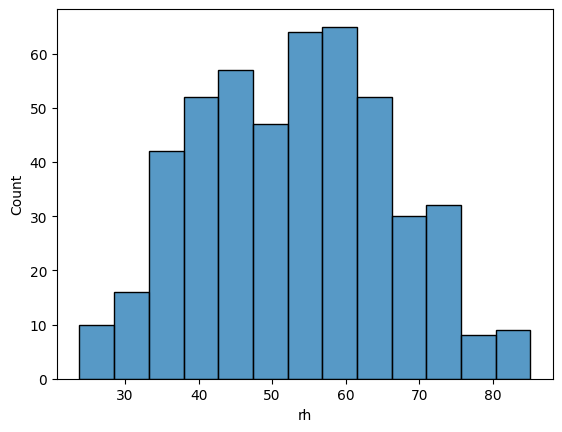

In [ ]:
sns.histplot(np.round(df["rh"], 1))

Промежуточный вывод:

rh оставляем, дальше есть задание, где нужно присвоить категорию по этому значению. Тем более такие показатели возможны в жизни, их нельзя отбросить, потому что составляют больше четверти столбца.

In [19]:
df["скорость_воздуха"]

,скорость_воздуха
0,0.26
1,0.12
2,0.08
3,27.16
4,63.83
...,...
479,0.32
480,0.16
481,0.02
482,0.02


<Axes: xlabel='скорость_воздуха', ylabel='Count'>

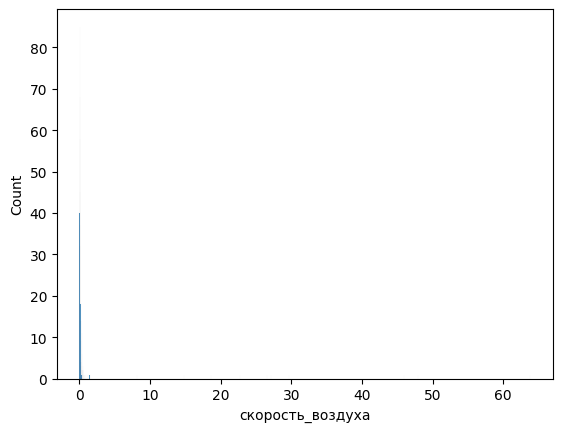

In [20]:
sns.histplot(df["скорость_воздуха"])

In [21]:
df["скорость_воздуха"].describe()

,скорость_воздуха
count,484.000000
mean,0.760558
std,4.921106
min,0.000000
25%,0.060000
50%,0.100000
75%,0.140000
max,63.830000


63 м/c - вау, то есть 226.8 км/ч внутри помещения. Похоже у кого-то ураган... (или выброс)

<Axes: xlabel='скорость_воздуха', ylabel='Count'>

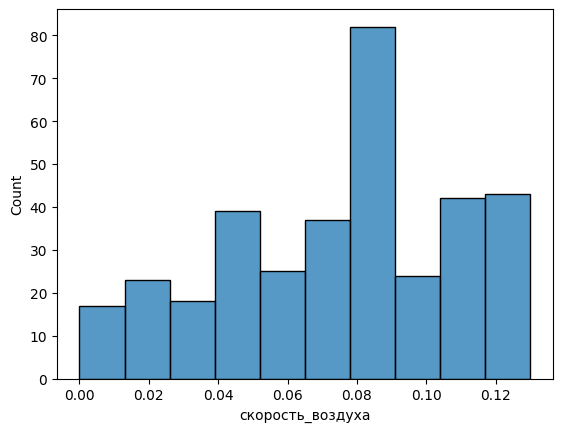

In [22]:
sns.histplot(df.loc[df["скорость_воздуха"] < np.percentile(df["скорость_воздуха"], 75), "скорость_воздуха"])

<Axes: ylabel='скорость_воздуха'>

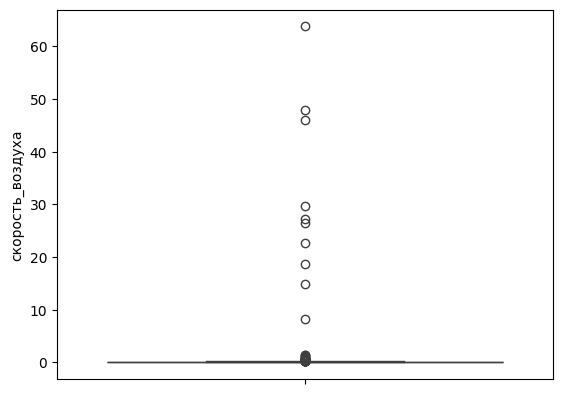

In [25]:
sns.boxplot(df["скорость_воздуха"])

Справка:

*   0,1 - 0,3 м/с - нормальная скорость воздуха в офисе
*   < 0,5 м/с - нормально для цеха



In [39]:
mask = df["скорость_воздуха"] > 0.5
df.loc[mask, "скорость_воздуха"].sort_values()

,скорость_воздуха
299,0.53
358,0.54
412,0.56
399,0.56
457,0.57
420,0.60
367,0.65
328,0.77
382,0.82
476,1.00


Так, значения до 8 м выглядят приемлимо, а те что больше - совсем нет. Проверим открыты ли окна или двери

In [43]:
res_df = df.loc[mask, ["год", "время_года", "город",  "окно", "двери", "скорость_воздуха"]].sort_values(by="скорость_воздуха")
res_df

,год,время_года,город,окно,двери,скорость_воздуха
299,2012.0,Лето,Ахмедабад,0.0,NaN,0.53
358,2012.0,Лето,Ахмедабад,1.0,NaN,0.54
412,2012.0,Лето,Дели,0.0,NaN,0.56
399,2012.0,Зима,Ченнай,NaN,NaN,0.56
457,2012.0,Весна,Хайдарабад,0.0,0.0,0.57
420,2012.0,Зима,Ченнай,0.0,0.0,0.60
367,2012.0,Лето,Ченнай,NaN,NaN,0.65
328,2012.0,Весна,Хайдарабад,0.0,1.0,0.77
382,2012.0,Лето,Дели,1.0,NaN,0.82
476,2012.0,Лето,Ахмедабад,1.0,NaN,1.00


In [44]:
res_df["скорость_воздуха"] *= 3.6
res_df

,год,время_года,город,окно,двери,скорость_воздуха
299,2012.0,Лето,Ахмедабад,0.0,NaN,1.908
358,2012.0,Лето,Ахмедабад,1.0,NaN,1.944
412,2012.0,Лето,Дели,0.0,NaN,2.016
399,2012.0,Зима,Ченнай,NaN,NaN,2.016
457,2012.0,Весна,Хайдарабад,0.0,0.0,2.052
420,2012.0,Зима,Ченнай,0.0,0.0,2.160
367,2012.0,Лето,Ченнай,NaN,NaN,2.340
328,2012.0,Весна,Хайдарабад,0.0,1.0,2.772
382,2012.0,Лето,Дели,1.0,NaN,2.952
476,2012.0,Лето,Ахмедабад,1.0,NaN,3.600


Фактчек: [погода в Техасе в 2011](https://www.weather.gov/ama/2011_weather_review)


**June**

The only four tornadoes that were reported in the Panhandles this year occurred on June 11 and mainly affected the eastern half of the Oklahoma Panhandle and the northeastern Texas Panhandle.  Three EF-0 tornadoes occurred near Follett and Darrouzett, TX and Boyd, OK.  **An EF-1 tornado occurred near Tyron**, OK.  In addition to the tornadoes, **large hail and damaging winds** were also reported.  Another severe weather event occurred on June 28 and resulted in several reports of wind damage across Beaver County.  In addition to the severe weather, wildfires also continued to be a problem.

**July**

**The most impressive statistic is that July ended up being the warmest of any month ever on record (since 1892) at Amarillo!**  The good news is that the winds finally began to subside, which allowed the threat for wildfires to diminish greatly.  Hit and miss showers and thunderstorms provided some relief from the heat, but almost all areas still saw well below normal precipitation.  Any thunderstorms that formed were often accompanied by very strong wind gusts.  On July 22, a collapsing thunderstorm produced an **81-mph wind** gust at Amarillo.
* 81-mph - 130 км/ч

**August**

Largely due to a tap of monsoonal moisture across New Mexico, prospects for showers and thunderstorms increased across the area.  On August 9, severe thunderstorms impacted much of the central Texas Panhandle and the eastern Oklahoma Panhandle.  120-mph straight line winds caused damage to hog farms near Beaver, OK while 90-mph winds caused damage near Pampa, TX.

* 120-mph - 193 км/ч

Вывод:

-> значение 229 км/ч - по данным выброс, но может быть объясним сбоем датчиков

-> значения в Техасе за 2011 аномальны, что по историческим данным объяснимо

-> если будем строить что-то связанное с ветром, то будем использовать данные, где ветер до 8 м/с

In [48]:
fixed_df = df
fixed_df["окно"] = fixed_df["окно"].fillna("NaN")
fixed_df["двери"] = fixed_df["двери"].fillna("NaN")
grouped_dw = df[["окно", "двери"]].value_counts().reset_index()
grouped_dw

,окно,двери,count
0,NaN,NaN,201
1,0.0,0.0,121
2,0.0,NaN,72
3,1.0,NaN,54
4,0.0,1.0,17
5,1.0,1.0,10
6,1.0,0.0,5
7,NaN,0.0,2
8,NaN,1.0,2


В окнах и дверях много пропусков, которые не получится восстановить просто так, с головы. Будем это учитывать в дальнейшем

Оценка клиента

<Axes: xlabel='оценка_комфорта', ylabel='Count'>

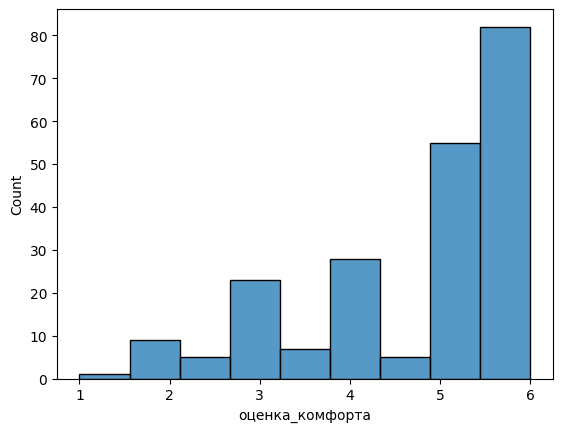

In [50]:
sns.histplot(df["оценка_комфорта"])

In [59]:
mask = df["оценка_комфорта"].isin([float(i) for i in range(1, 7)])
gr_df = df.loc[mask, ["страна", "год", "город"]]
gr_df.value_counts()

страна  год     город    
США     2011.0  Техас        72
Индия   2012.0  Ахмедабад    38
                Дели         35
                Шимла        32
                Бангалор     26
                Ченнай       12
Name: count, dtype: int64

In [61]:
df[["страна", "год", "город"]].value_counts()

страна     год     город     
Австралия  2010.0  Сидней        198
США        2011.0  Техас          72
Индия      2012.0  Ченнай         51
                   Ахмедабад      38
                   Дели           35
                   Хайдарабад     32
                   Шимла          32
                   Бангалор       26
Name: count, dtype: int64

Нецелые оценки:


*   2011: Техас
*   2012: Ахмедабад, Дели, Шимла, Бангалор и частично Ченнай


Округлим дробную оценку, а отсутствие оценки обозначим, как 0!

<Axes: xlabel='оценка_комфорта', ylabel='Count'>

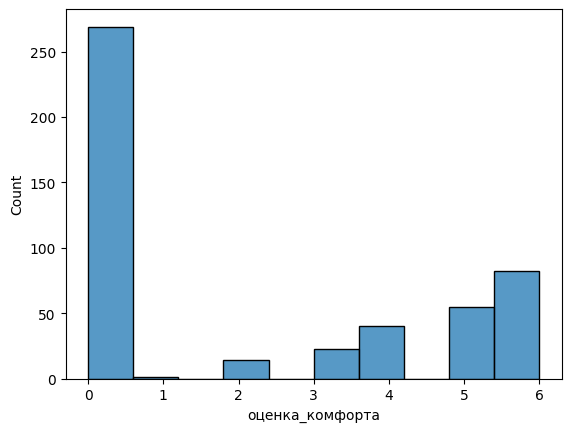

In [54]:
df["оценка_комфорта"] = np.round(df["оценка_комфорта"], 0)
df["оценка_комфорта"] = df["оценка_комфорта"].fillna(0.0)
df["оценка_комфорта"] = df["оценка_комфорта"].astype(int)
sns.histplot(df["оценка_комфорта"])

In [63]:
df["утепление"].value_counts()

,count
утепление,
0.46,64
0.57,37
0.61,33
0.68,26
0.41,18
...,...
1.67,1
1.40,1
0.93,1


Утепление (как-то связано с одеждой, предварительно округлим до 1 знака). Варианты:
1. год + страна + климат + пол (группы выходят мелкими)
2. год + город
3. год + климат

In [71]:
# np.round(df["утепление"], 1).value_counts()
t_df = df[["утепление", "климат", "страна", "год", "пол"]].value_counts().reset_index()
t_df.describe()

,утепление,год,count
count,166.000000,166.000000,166.000000
mean,0.786325,2011.493976,2.481928
std,0.348215,0.872106,5.178888
min,0.360000,2010.000000,1.000000
25%,0.570000,2010.500000,1.000000
50%,0.690000,2012.000000,1.000000
75%,0.867500,2012.000000,2.000000
max,2.080000,2012.000000,61.000000


In [76]:
# np.round(df["утепление"], 1).value_counts()
t_df = df
t_df["утепление"] = np.round(t_df["утепление"], 1)
t_df = df[["город", "год", "утепление"]].value_counts().reset_index()
t_df.describe()

,год,утепление,count
count,57.000000,57.000000,57.000000
mean,2011.719298,0.885965,8.491228
std,0.647919,0.371021,16.816364
min,2010.000000,0.400000,1.000000
25%,2012.000000,0.600000,1.000000
50%,2012.000000,0.800000,3.000000
75%,2012.000000,1.000000,7.000000
max,2012.000000,2.100000,83.000000


In [85]:
df[["климат", "год", "утепление"]].value_counts().reset_index()

,климат,год,утепление,count
0,Cубтропический океанический,2010.0,0.4,83
1,Cубтропический океанический,2010.0,0.5,82
2,Cубтропический океанический,2011.0,0.6,59
3,Жаркий полузасушливый,2012.0,0.7,37
4,Тропическая влажная саванна,2012.0,0.7,34
5,Cубтропический океанический,2010.0,0.6,24
6,Жаркий полузасушливый,2012.0,0.6,18
7,Тропическая влажная саванна,2012.0,0.6,17
8,Тропическая влажная саванна,2012.0,0.8,12
9,Cубтропический океанический,2011.0,0.5,10


Пока остановимся на мысли, что утепление в одежде легче предсказать по городу и году